In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
house_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
house_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

# I'll convert ordinal variables to numeric, don't bother in the next cell it's just convert categorical data to numerical to represent it in the right form.

In [4]:
#Assigning numerical values for nominial train data
Numlist1 = ['BsmtQual','BsmtCond', 'FireplaceQu','GarageQual', 'GarageCond']
Numlist2 = ['BsmtExposure']
Numlist3 = ['BsmtFinType1' , 'BsmtFinType2']
Numlist4 = ['PoolQC']
Numlist5 = ['Fence']
Numlist6 = ['ExterQual','ExterCond','HeatingQC', 'KitchenQual']
Numlist7 = ['LotShape']
Numlist8 = ['LandSlope']
Numlist9 = ['Functional']
Numlist10 = ['GarageFinish']
def numeric_map1(x):
    return x.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 , np.nan : 0})
def numeric_map2(y):
    return y.map({'No' : 1 ,'Mn' : 2 , 'Av' : 3 , 'Gd' : 4 , np.nan : 0})
def numeric_map3(z):
    return z.map({'Unf' : 1 ,'LwQ' : 2 , 'Rec' : 3 , 'BLQ' : 4 ,'ALQ': 5, 'GLQ': 6, np.nan : 0})
def numeric_map4(a):
    return a.map({'Fa' : 1 ,'TA' : 2 , 'Gd' : 3 , 'Ex' : 4 , np.nan : 0})
def numeric_map5(b):
    return b.map({'MnWw' : 1 ,'GdWo' : 2 , 'MnPrv' : 3 , 'GdPrv' : 4 , np.nan : 0})
def numeric_map6(c):
    return c.map({'Po' : 1 ,'Fa' : 2 , 'TA' : 3 , 'Gd' : 4 , 'Ex' : 5 })
def numeric_map7(d):
    return d.map({'IR3' : 1 ,'IR2' : 2 , 'IR1' : 3 , 'Reg' : 4 })
def numeric_map8(e):
    return e.map({'Sev' : 1 ,'Mod' : 2 , 'Gtl' : 3 })
def numeric_map9(f):
    return f.map({'Sal' : 1 ,'Sev' : 2 , 'Maj2' : 3 ,'Maj1' : 4, 'Mod' : 5, 'Min2' : 6 , 'Min1' : 7, 'Typ' : 8})
def numeric_map10(g):
    return g.map({'Unf' : 1 ,'RFn' : 2 , 'Fin' : 3 , np.nan : 0})
house_train[Numlist1] = house_train[Numlist1].apply(numeric_map1)
house_train[Numlist2] = house_train[Numlist2].apply(numeric_map2)
house_train[Numlist3] = house_train[Numlist3].apply(numeric_map3)
house_train[Numlist4] = house_train[Numlist4].apply(numeric_map4)
house_train[Numlist5] = house_train[Numlist5].apply(numeric_map5)
house_train[Numlist6] = house_train[Numlist6].apply(numeric_map6)
house_train[Numlist7] = house_train[Numlist7].apply(numeric_map7)
house_train[Numlist8] = house_train[Numlist8].apply(numeric_map8)
house_train[Numlist9] = house_train[Numlist9].apply(numeric_map9)
house_train[Numlist10] = house_train[Numlist10].apply(numeric_map10)

#################################################################

house_test[Numlist1] = house_test[Numlist1].apply(numeric_map1)
house_test[Numlist2] = house_test[Numlist2].apply(numeric_map2)
house_test[Numlist3] = house_test[Numlist3].apply(numeric_map3)
house_test[Numlist4] = house_test[Numlist4].apply(numeric_map4)
house_test[Numlist5] = house_test[Numlist5].apply(numeric_map5)
house_test[Numlist6] = house_test[Numlist6].apply(numeric_map6)
house_test[Numlist7] = house_test[Numlist7].apply(numeric_map7)
house_test[Numlist8] = house_test[Numlist8].apply(numeric_map8)
house_test[Numlist9] = house_test[Numlist9].apply(numeric_map9)
house_test[Numlist10] = house_test[Numlist10].apply(numeric_map10)

# Split data for numerical and categorical variable

In [5]:
train_num = house_train.select_dtypes(exclude = ['object'])
train_cat = house_train.select_dtypes('object')
test_num = house_test.select_dtypes(exclude = ['object'])
test_cat = house_test.select_dtypes('object')

# EDA on numerical variables

- start with numerical variable 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

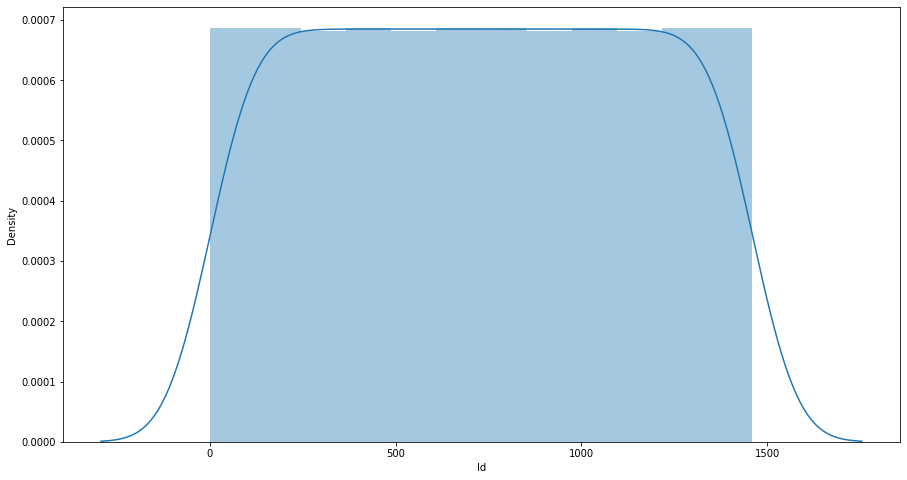

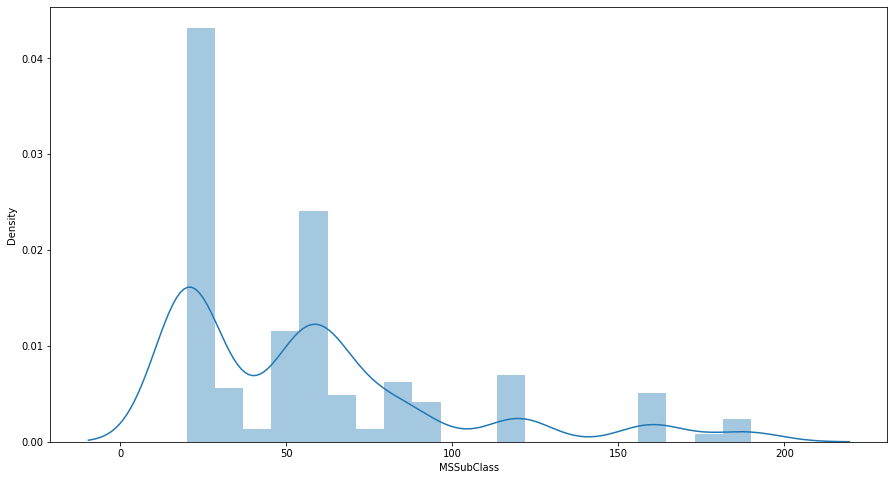

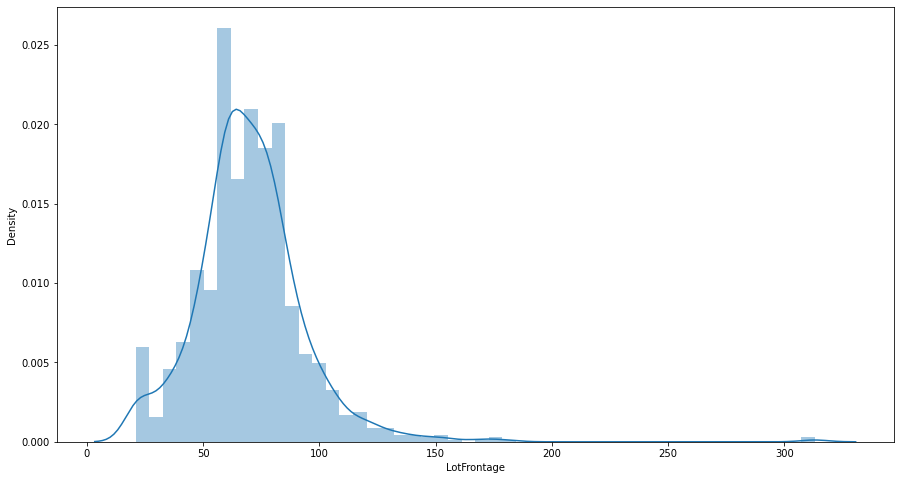

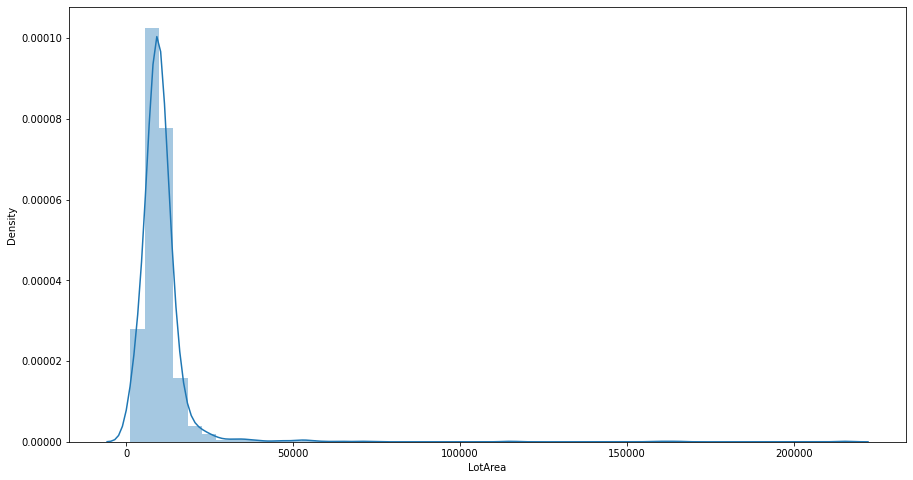

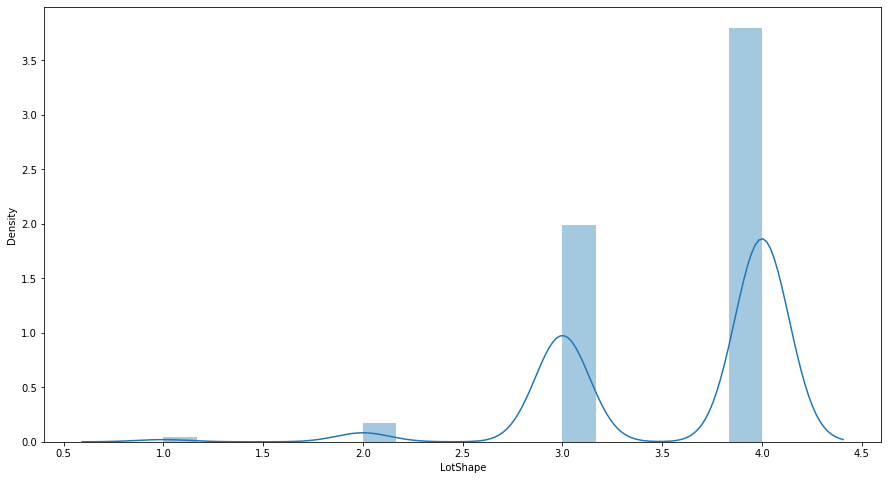

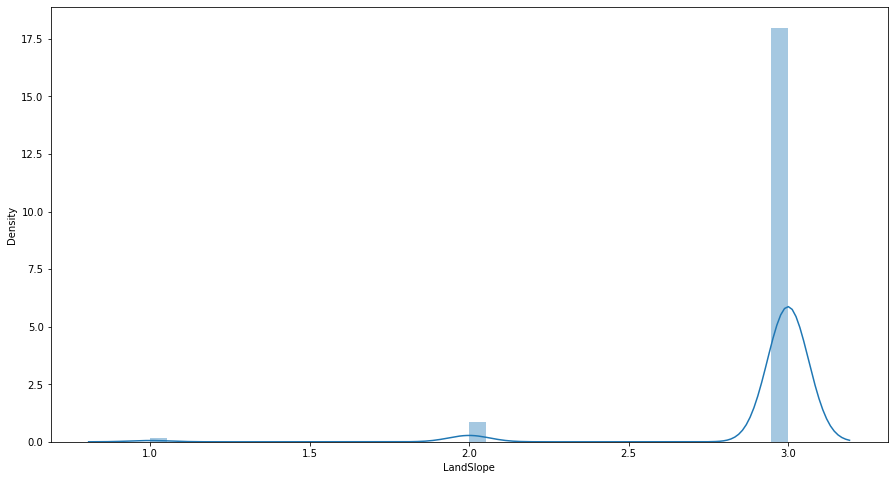

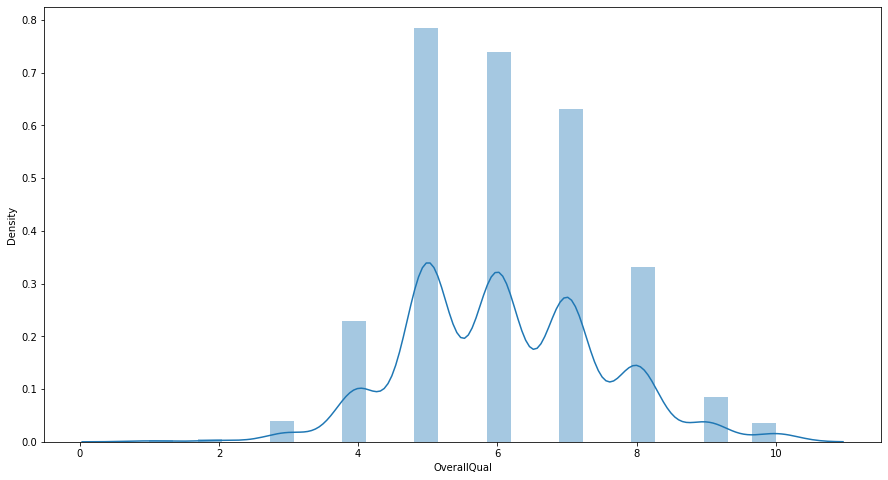

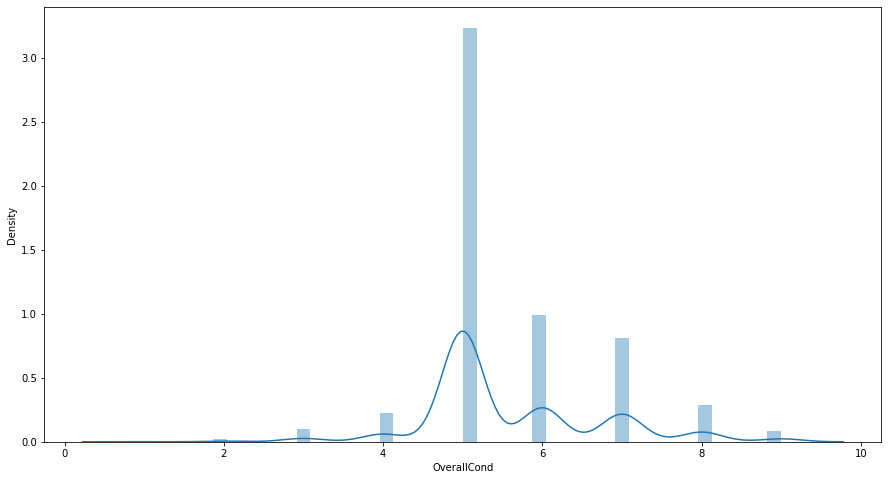

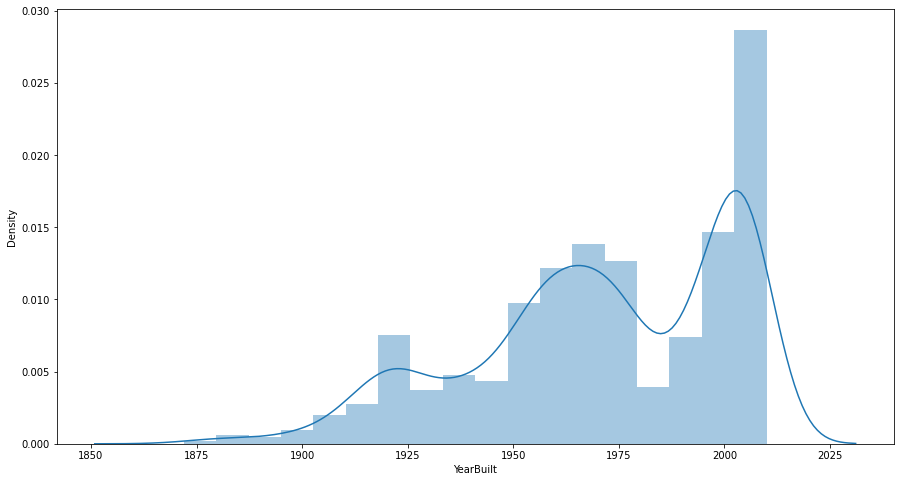

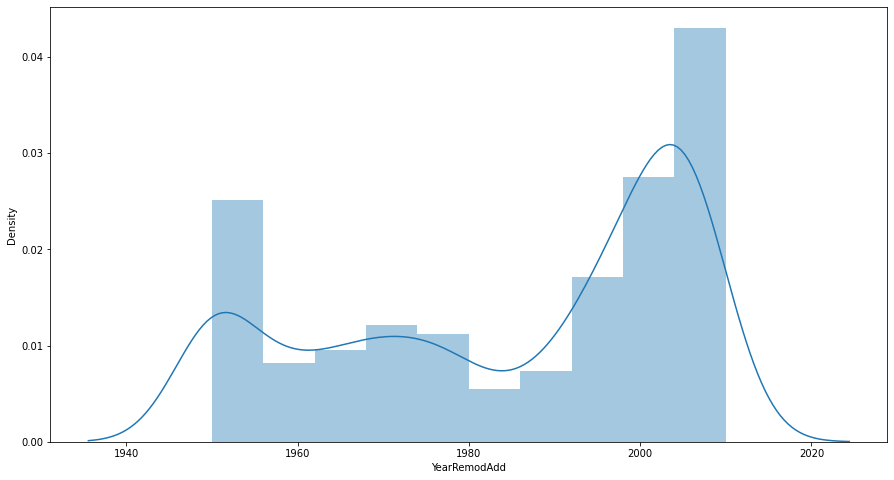

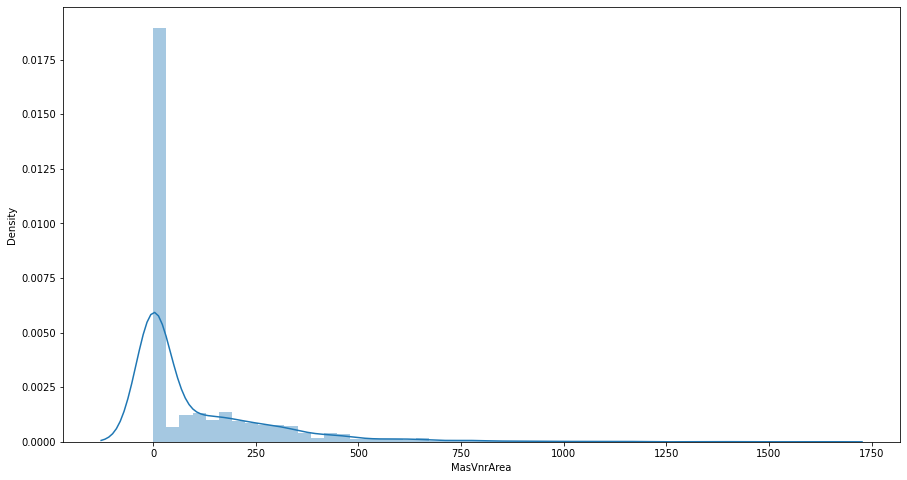

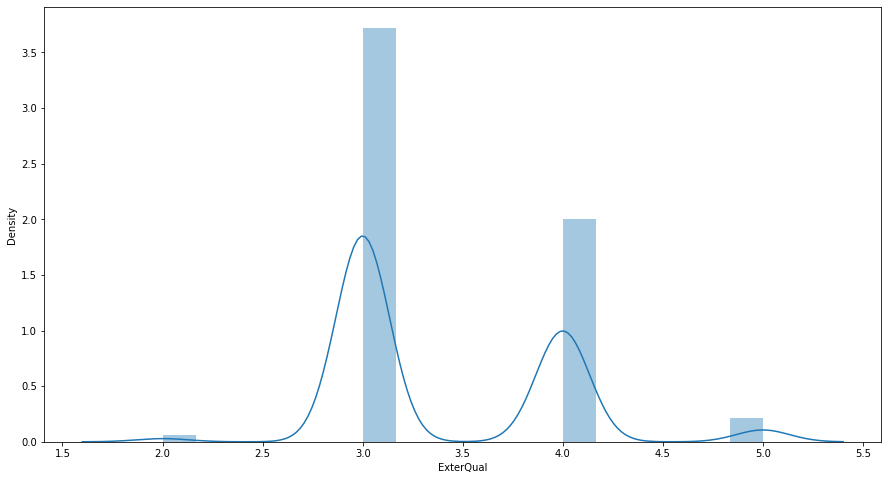

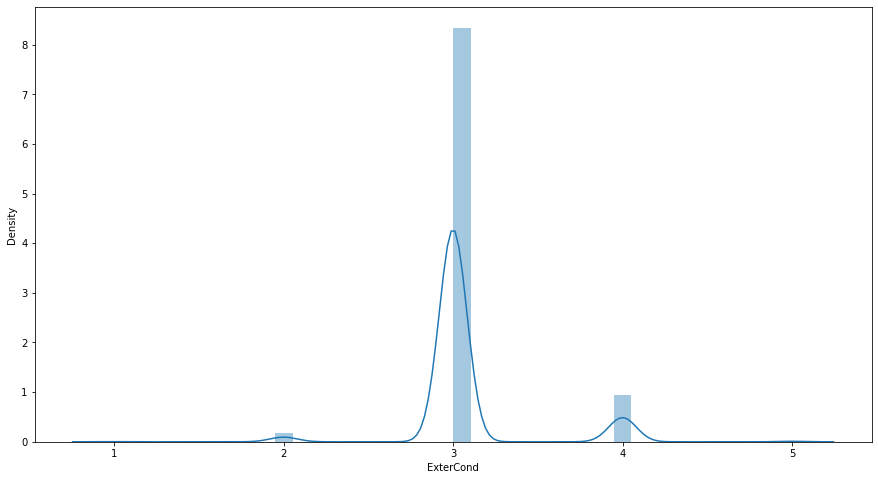

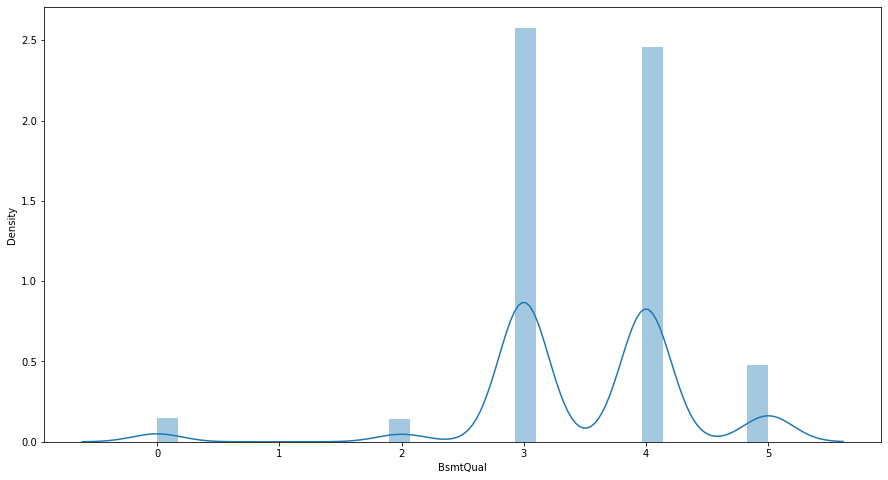

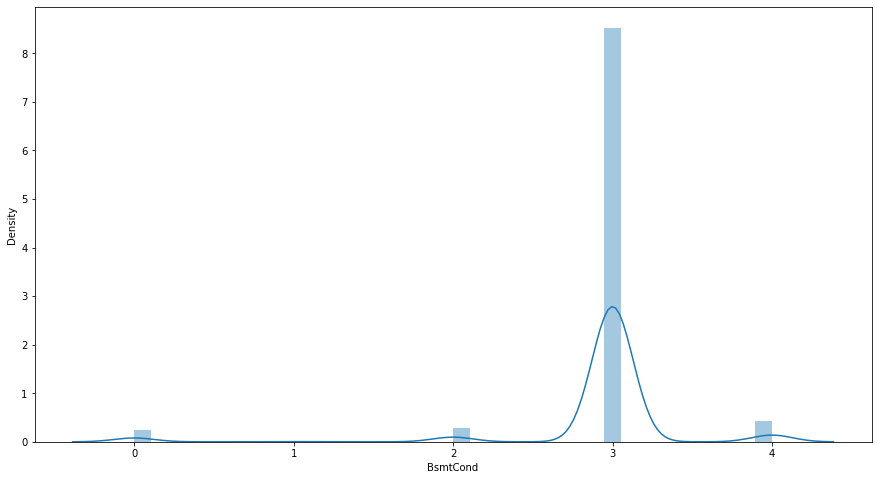

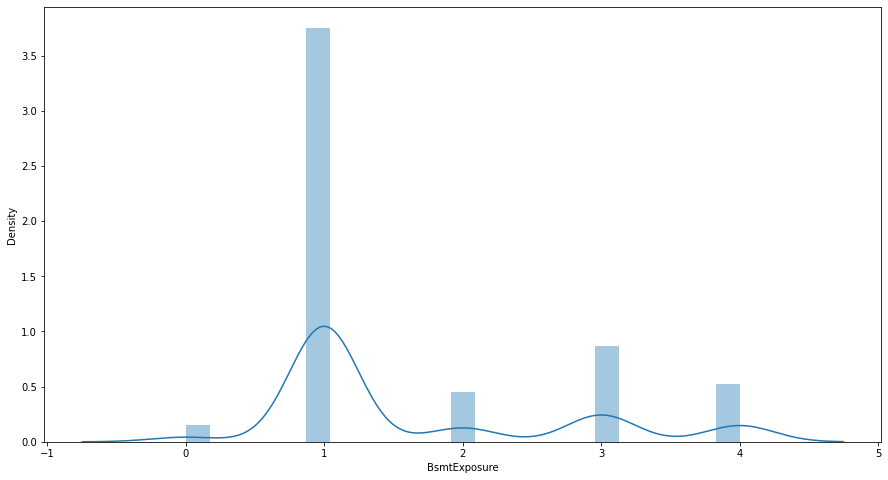

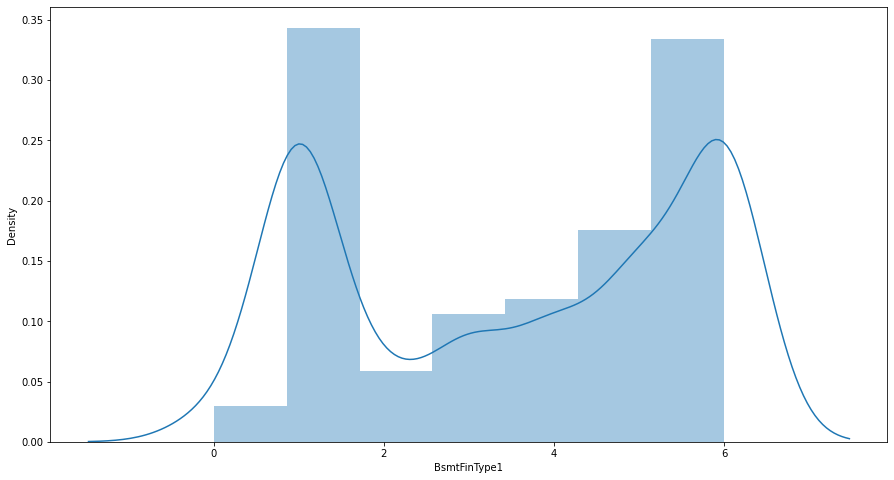

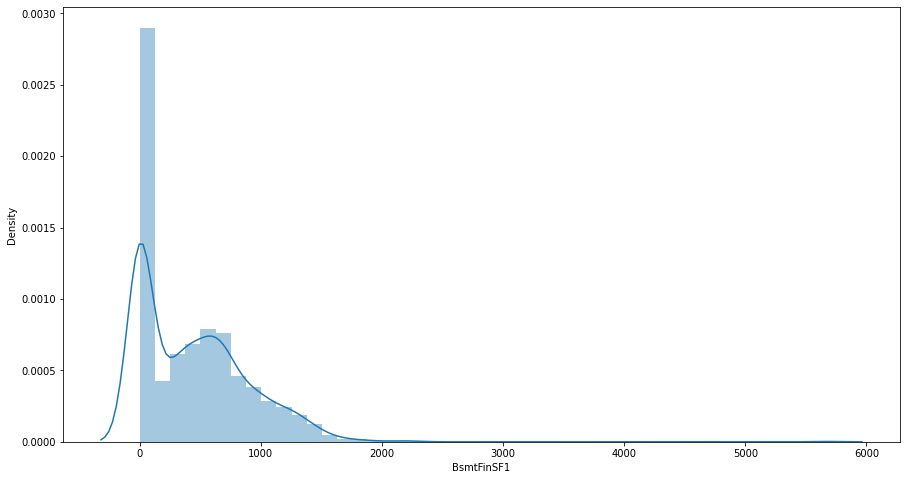

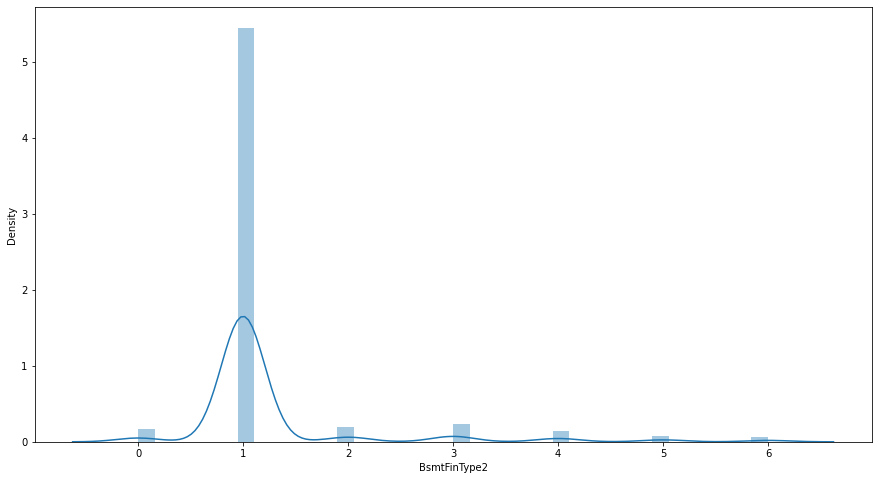

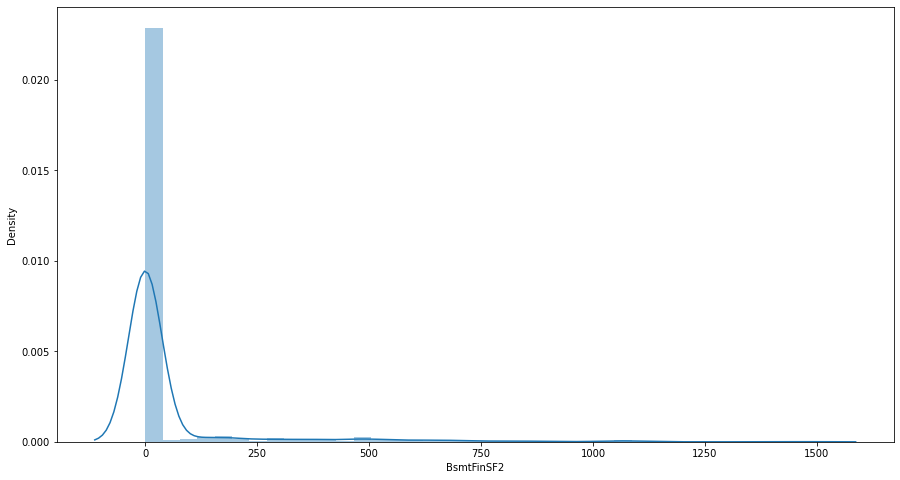

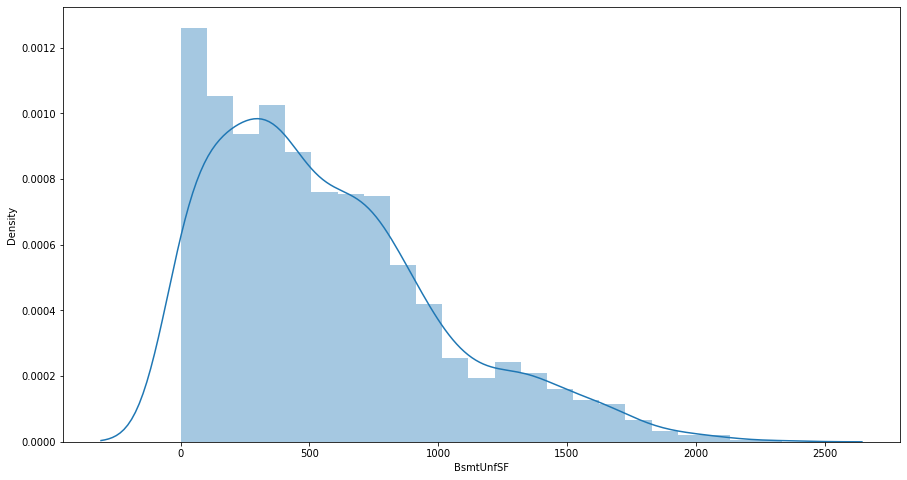

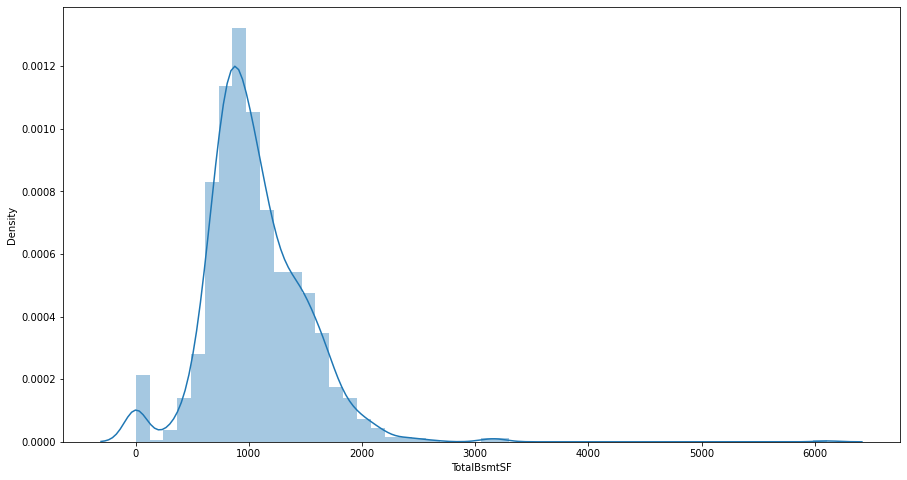

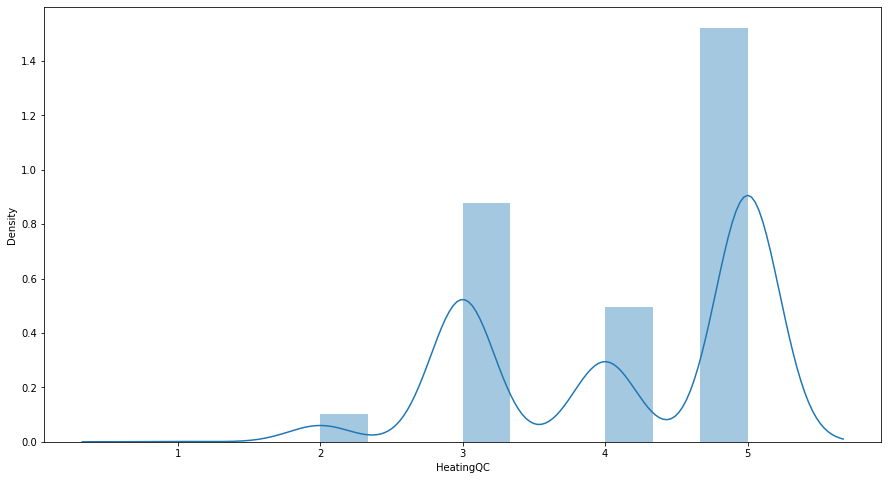

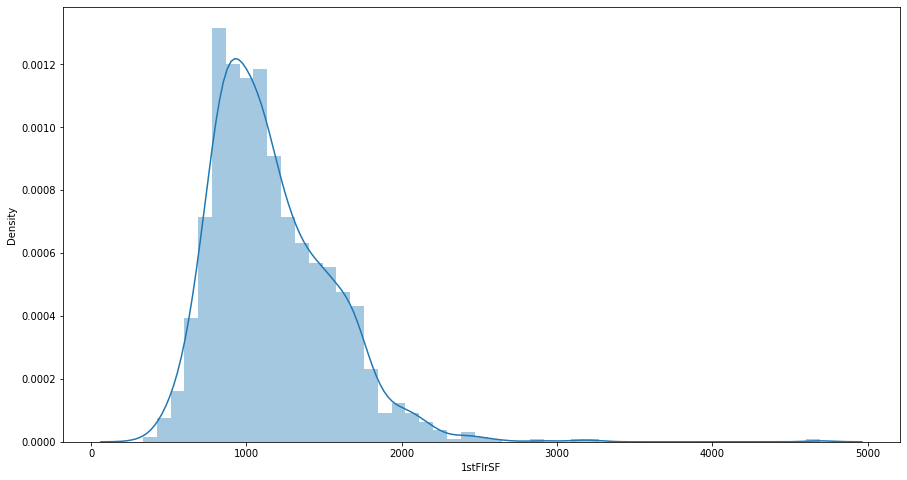

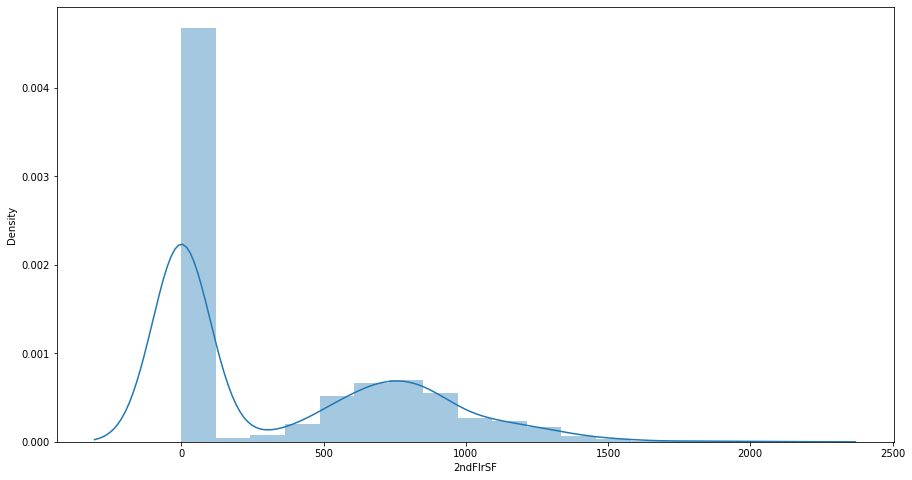

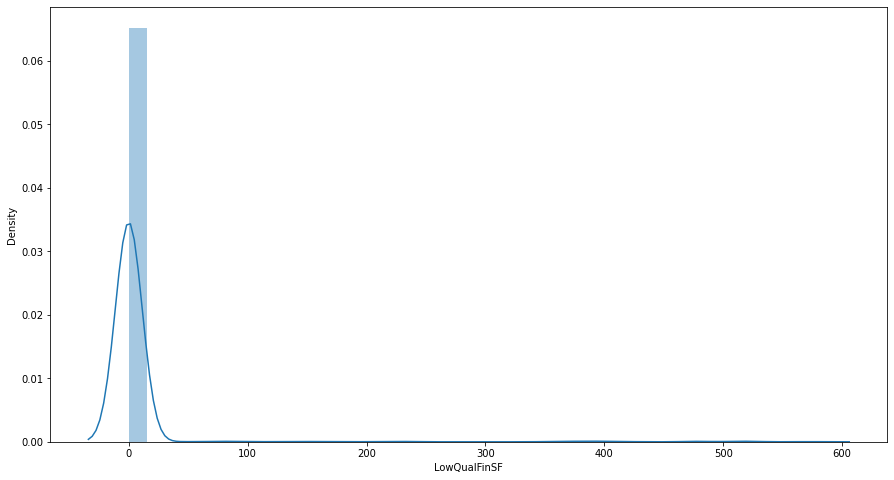

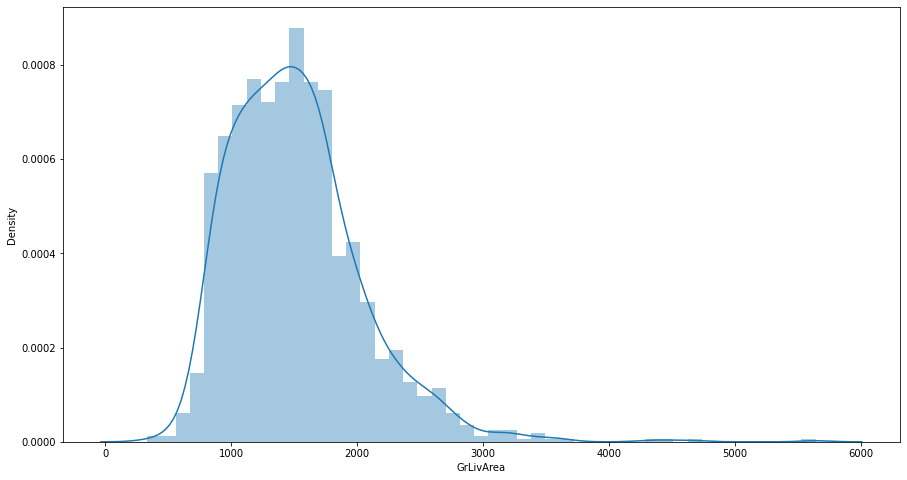

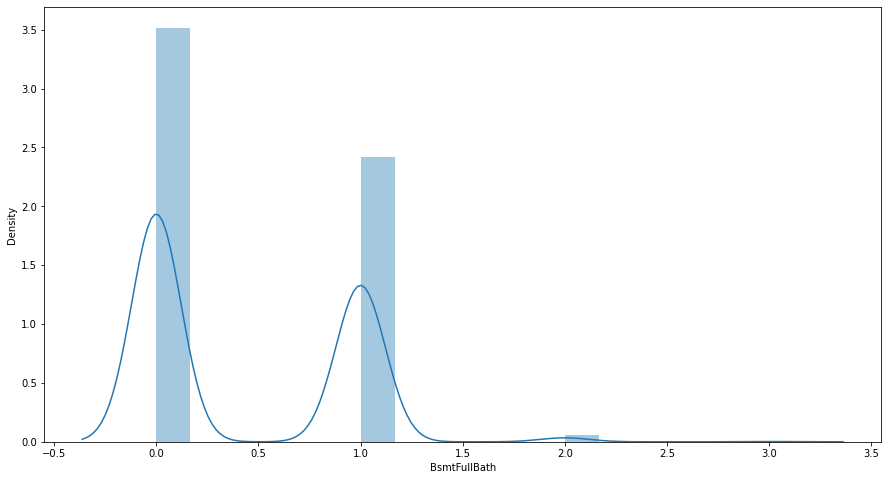

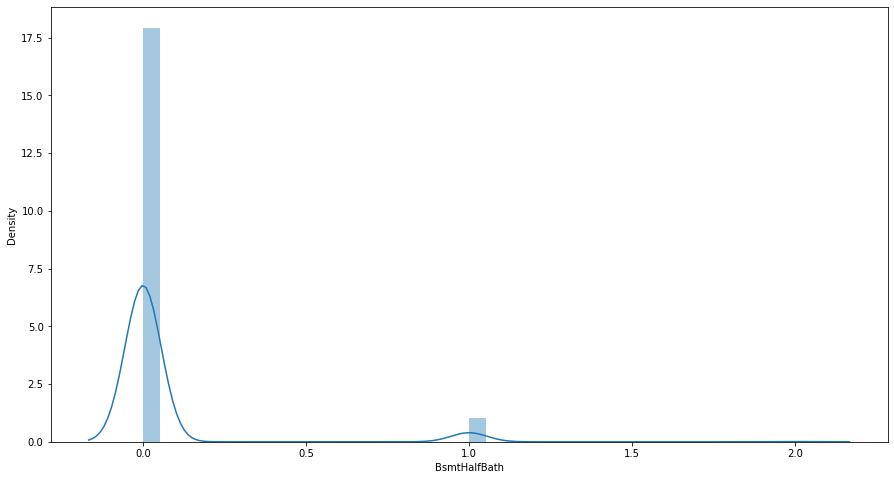

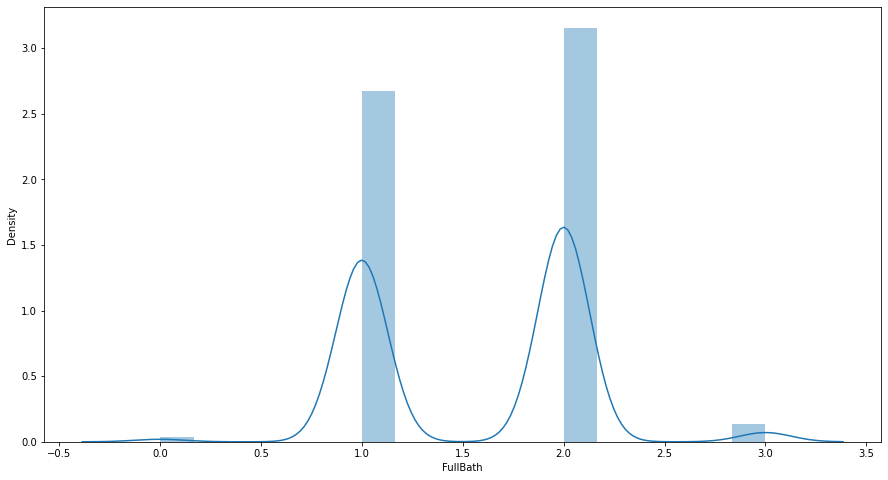

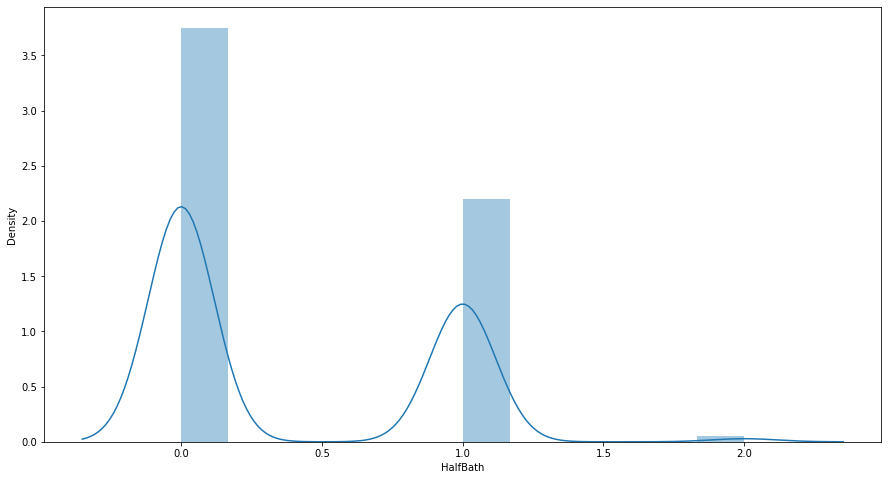

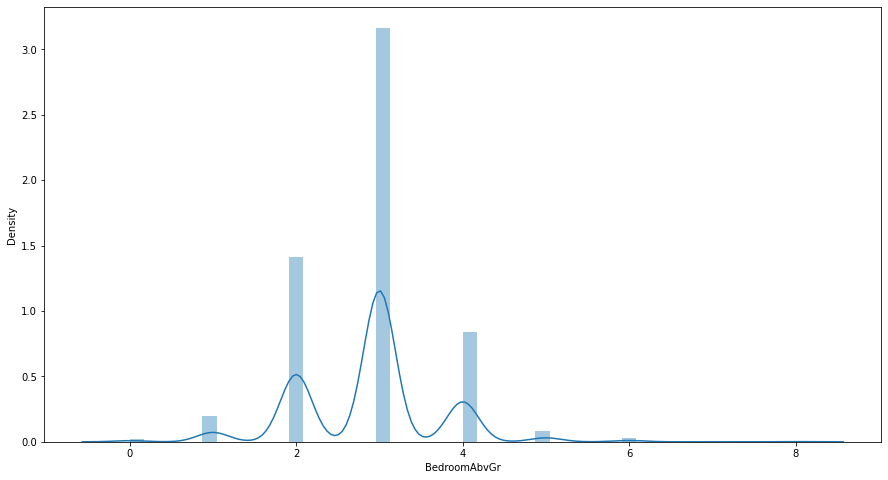

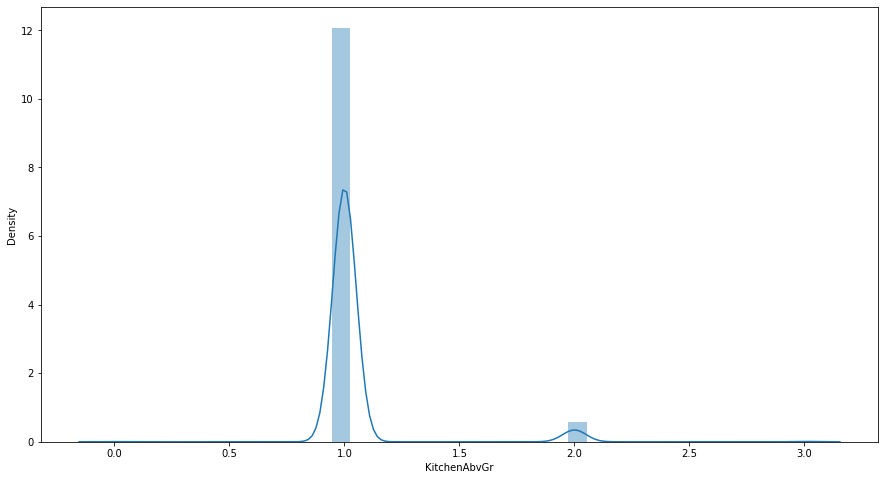

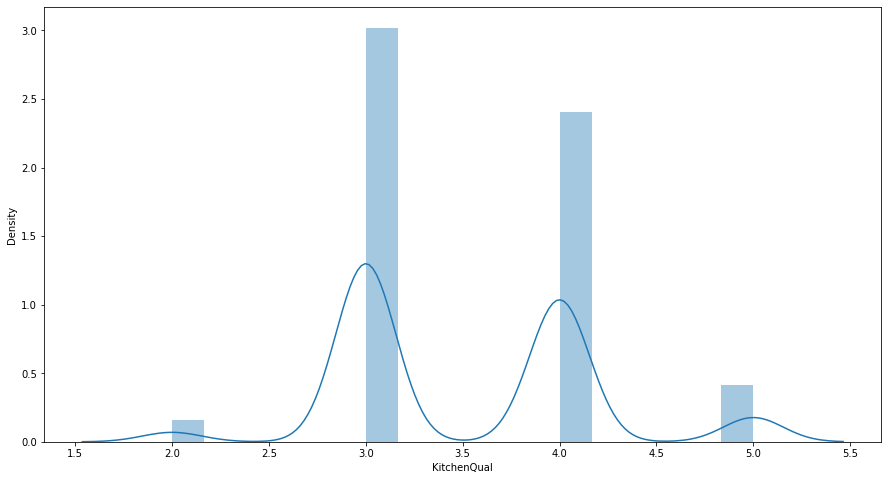

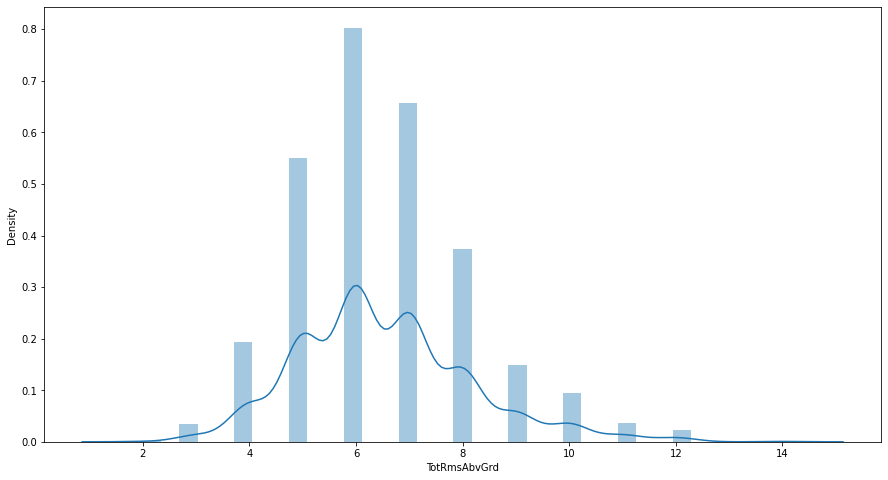

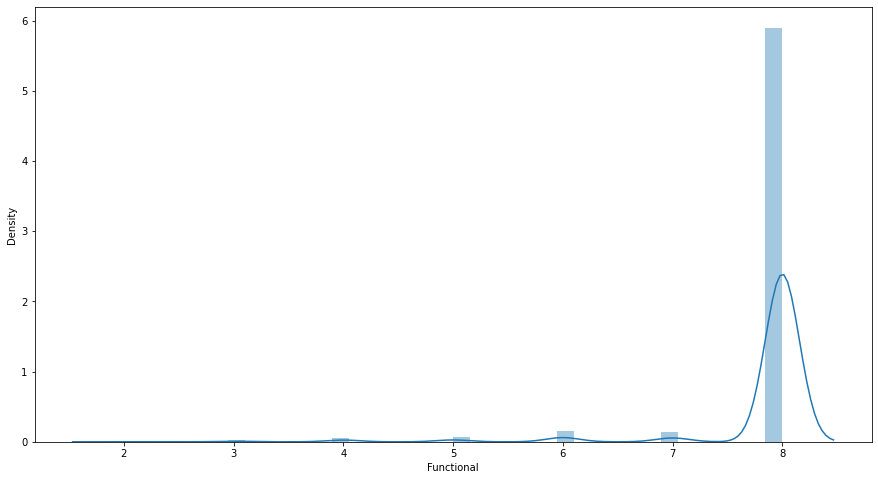

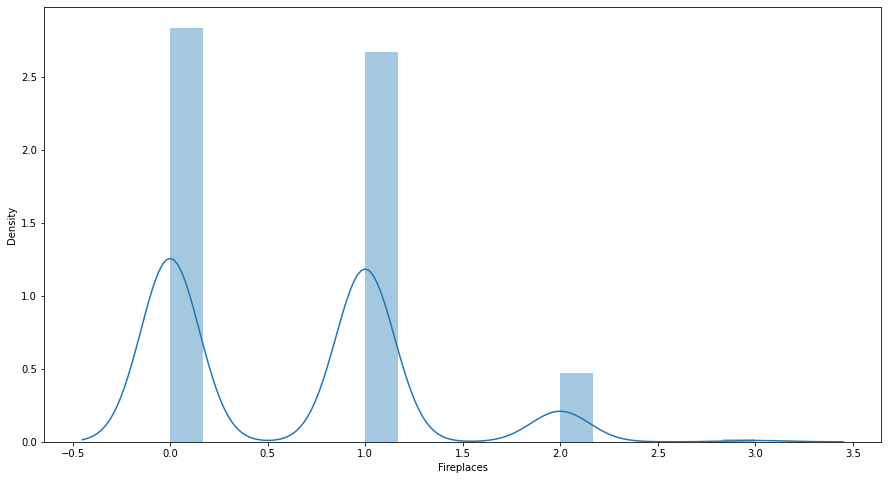

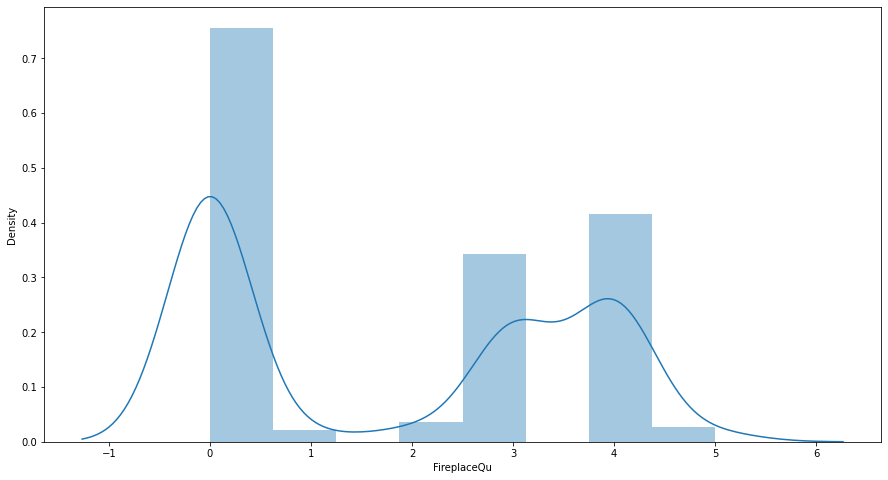

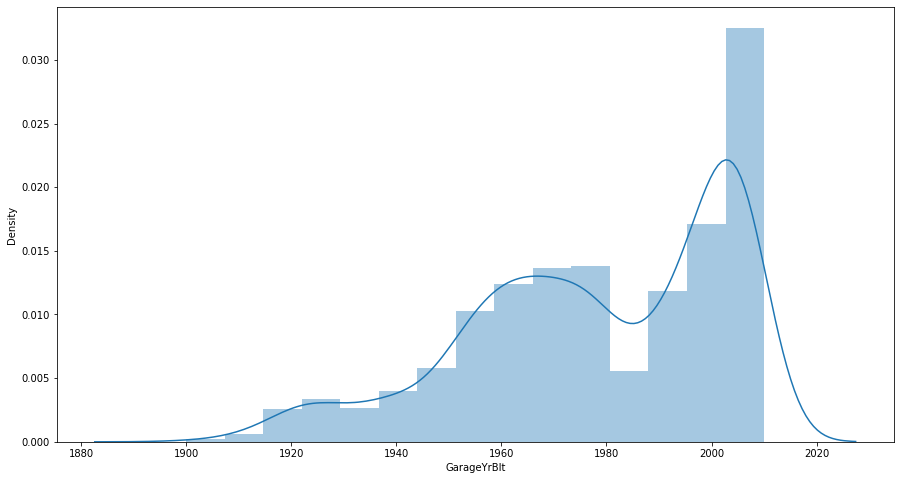

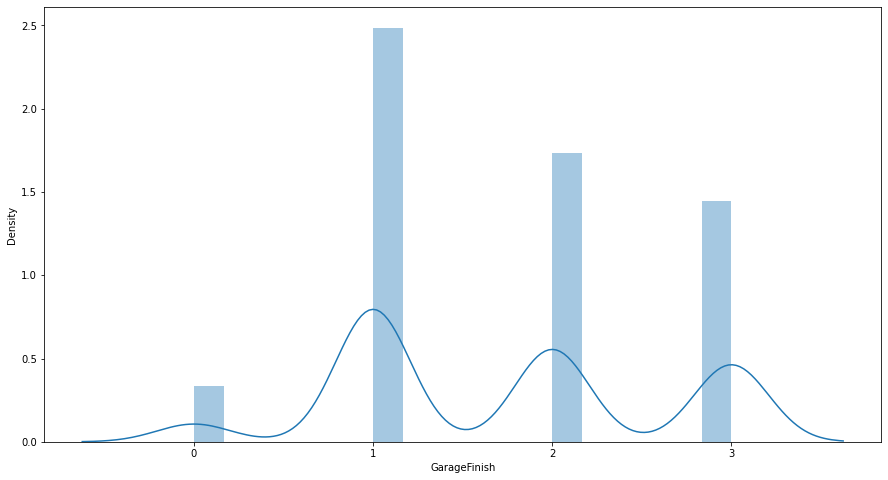

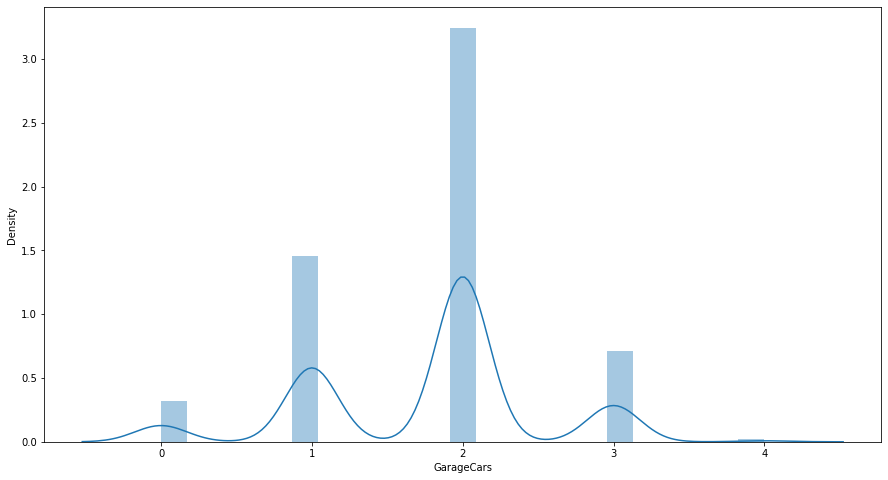

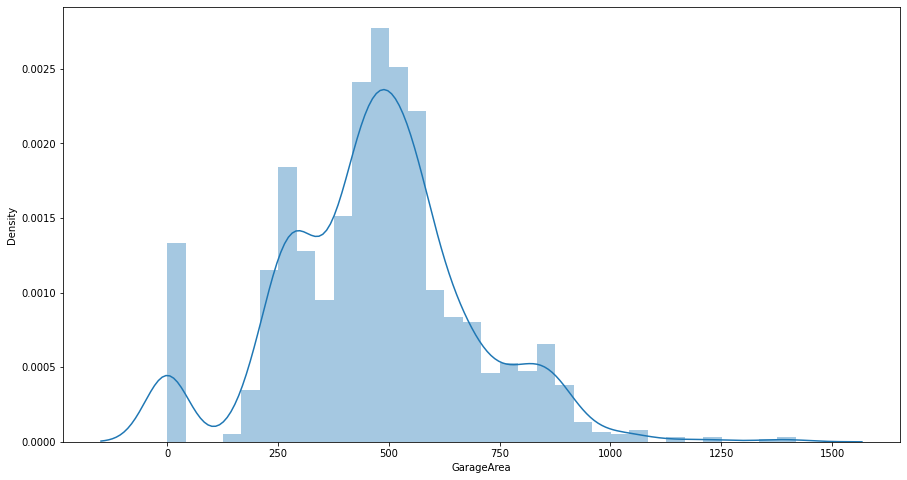

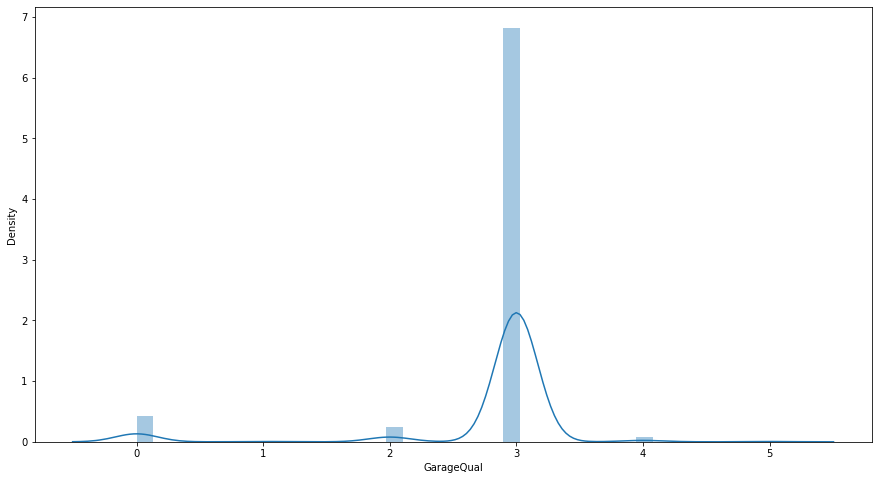

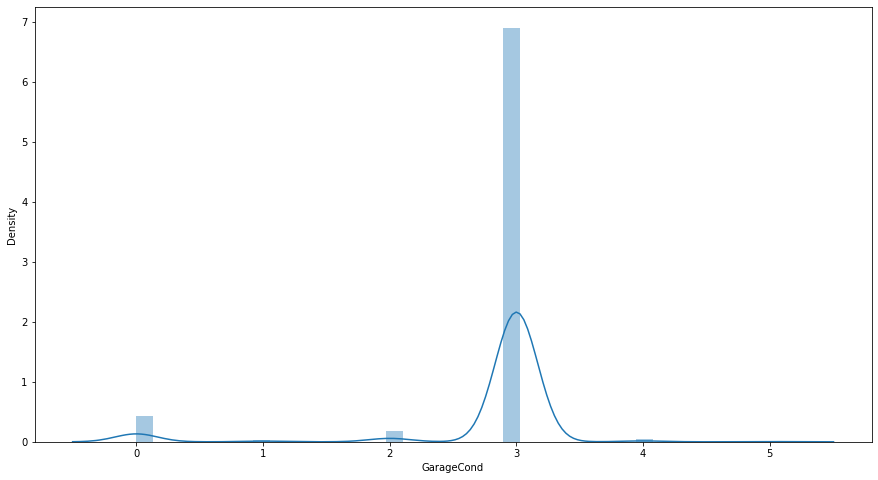

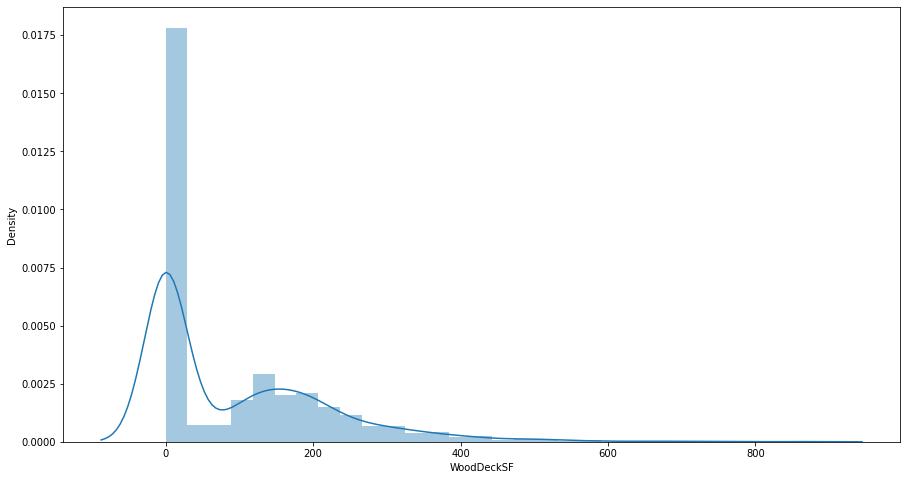

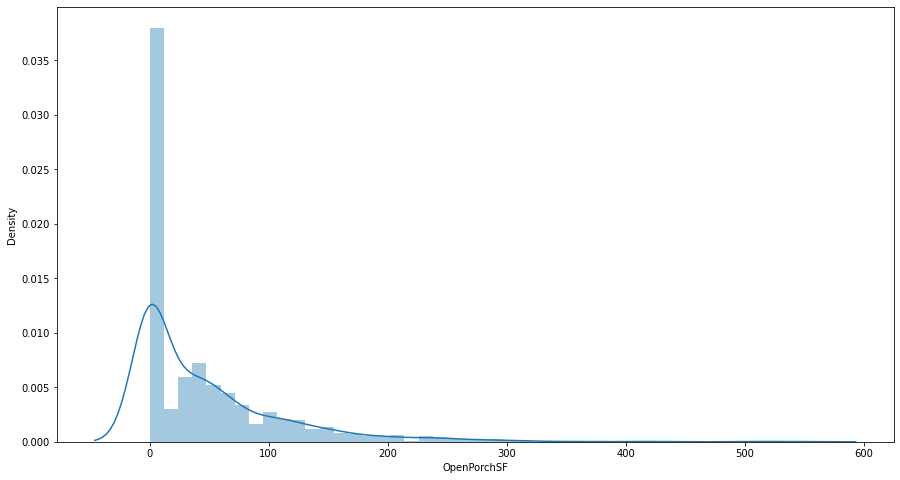

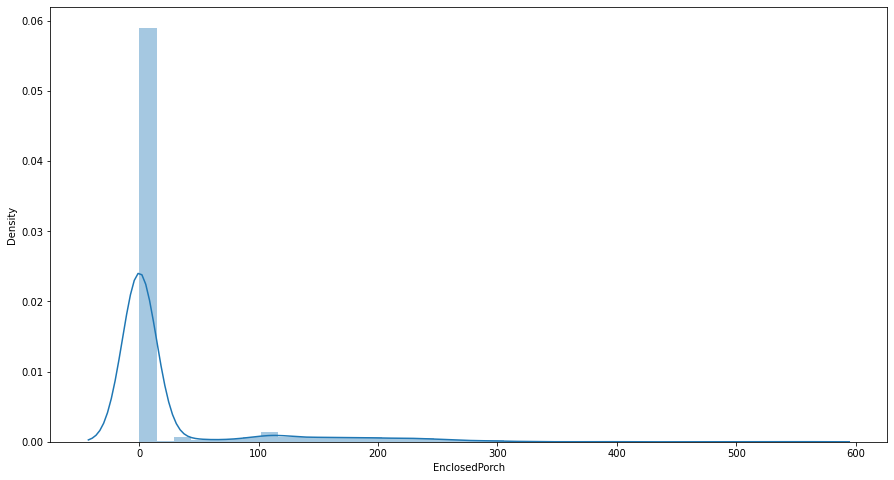

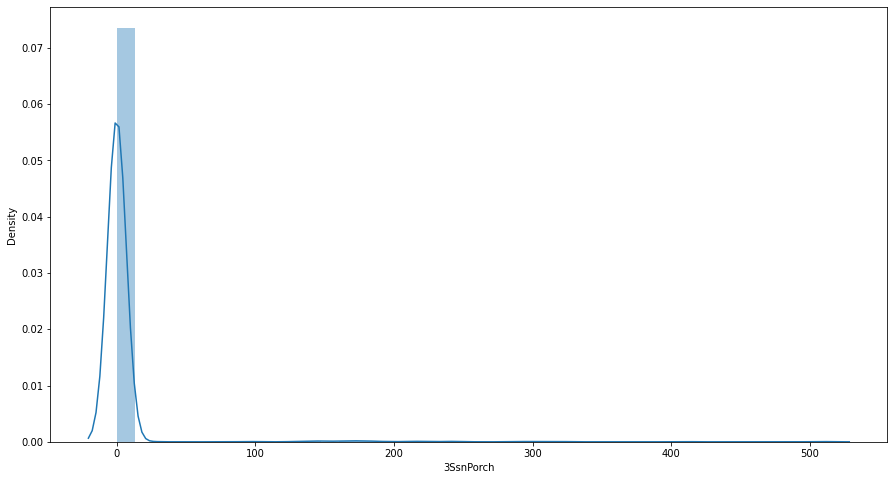

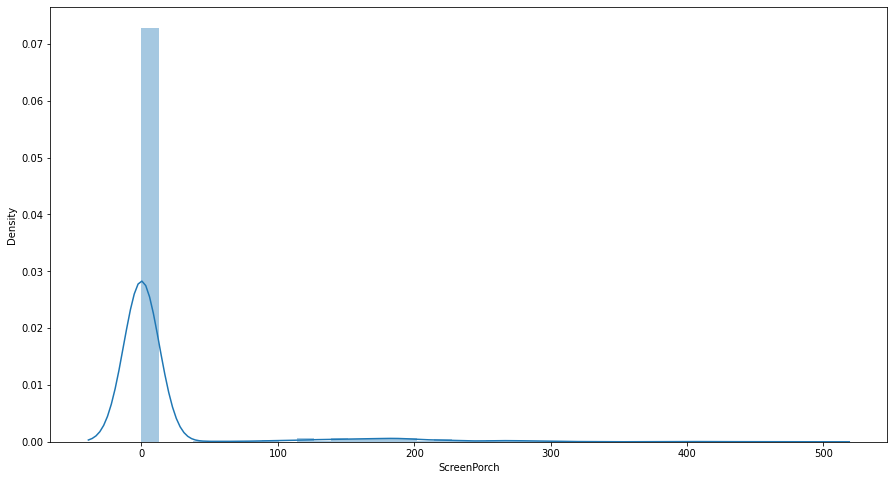

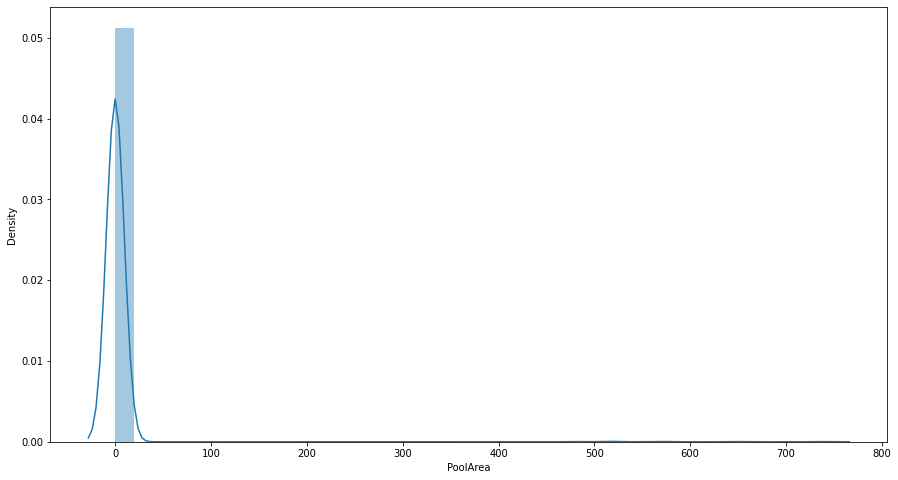

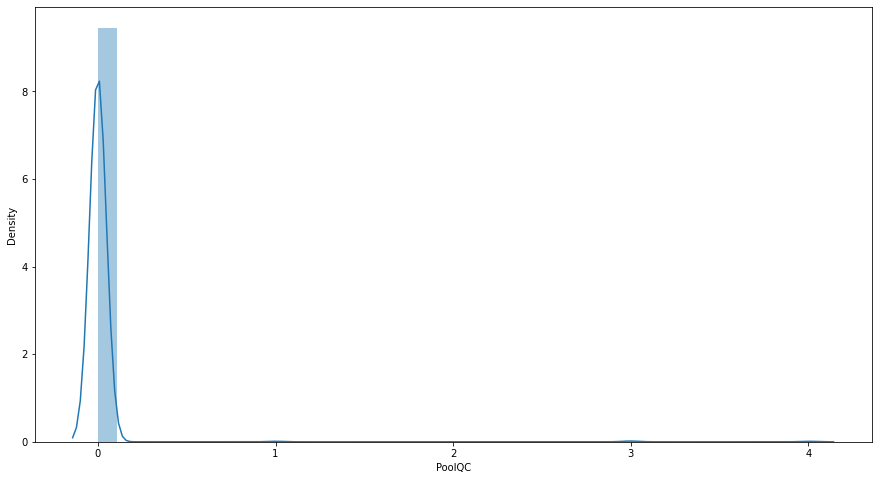

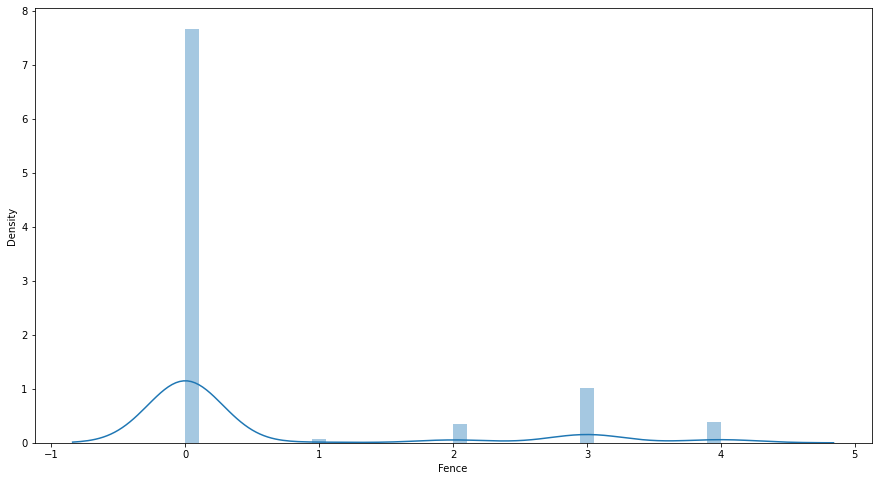

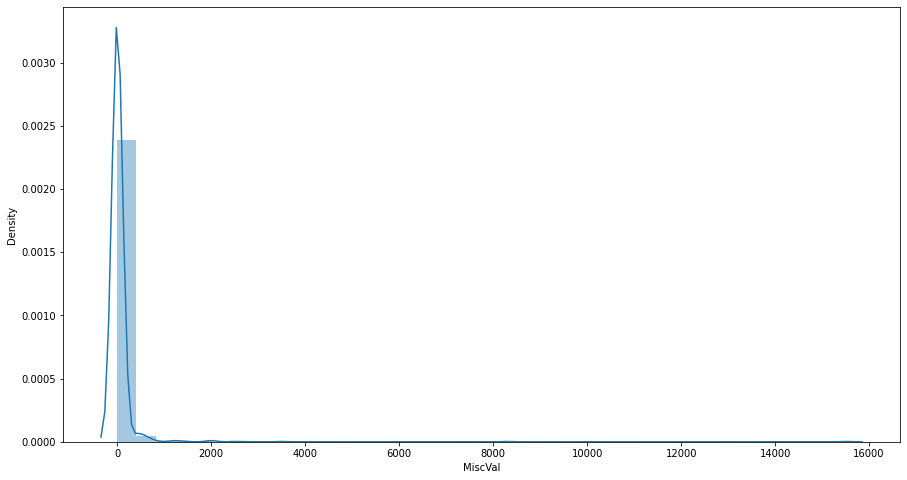

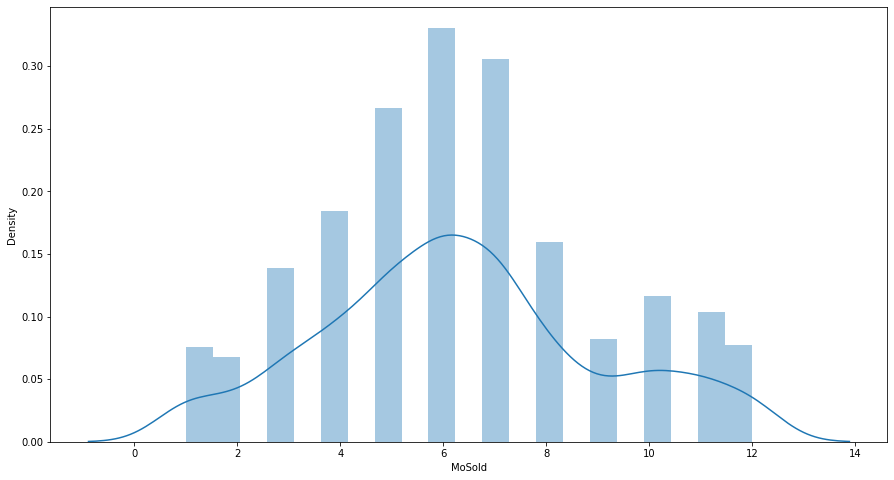

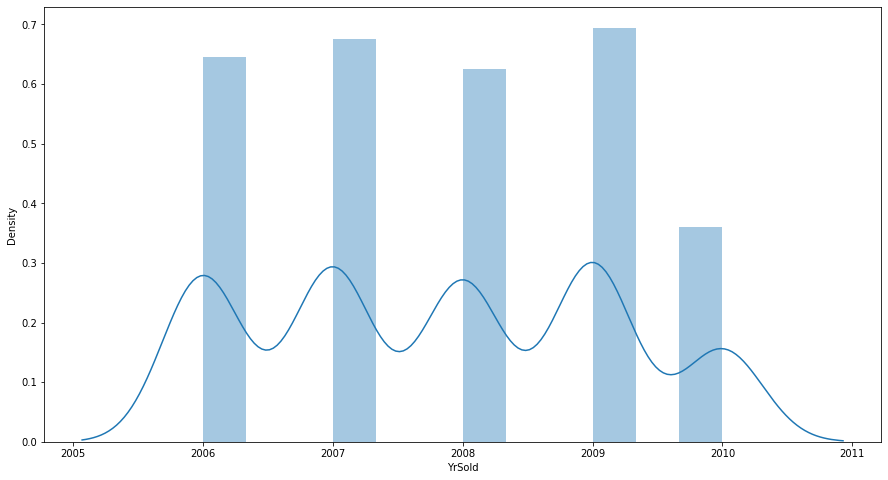

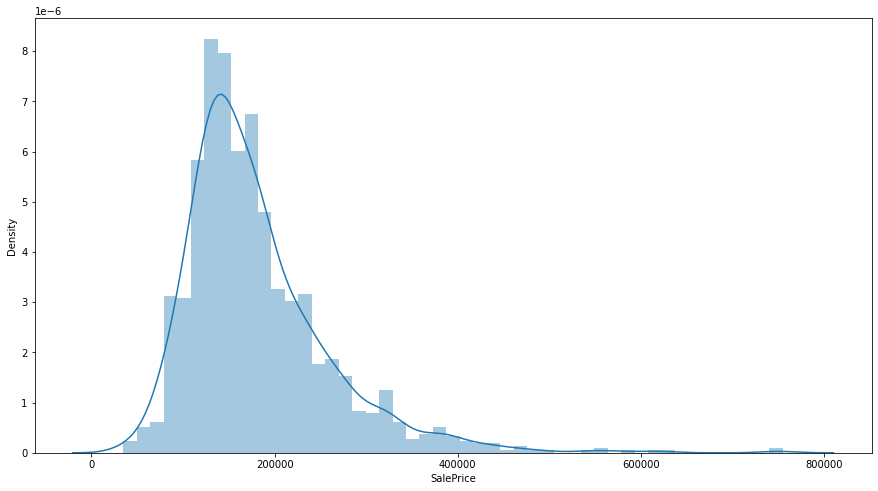

In [6]:
for i in train_num.columns:
    plt.figure(figsize=(15,8))
    sns.distplot(train_num[i])

Some features aren't numerical like MSSubClass, YrSold (Identifies the type of dwelling involved in the sale.)
so i don't believe that it will be need it

In [7]:
train_num.drop('MSSubClass', inplace = True, axis = 1)
test_num.drop('MSSubClass', inplace = True, axis = 1)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
train_num.drop('YrSold', inplace = True, axis = 1)
test_num.drop('YrSold', inplace = True, axis = 1)

In [9]:
train_num.drop('Id', inplace = True, axis = 1)
test_num.drop('Id', inplace = True, axis = 1)

# Let's Cheack the skewness

In [10]:
skewed_list = []
for i in train_num.columns:
    if abs(train_num[i].skew()) > 0.5:
        skewed_list.append(i)
skewed_list

['LotFrontage',
 'LotArea',
 'LotShape',
 'LandSlope',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'SalePrice']

I'll pick only the non ordinal features, and exclude the SalePrice also then I'll make Log function on them


In [11]:
skewed_list = ['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'BsmtUnfSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'KitchenAbvGr',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 ]

# Cheack correlation & Multicorlinarity

In [12]:
#corr
#corr['SalePrice'].sort_values(ascending = False).abs()

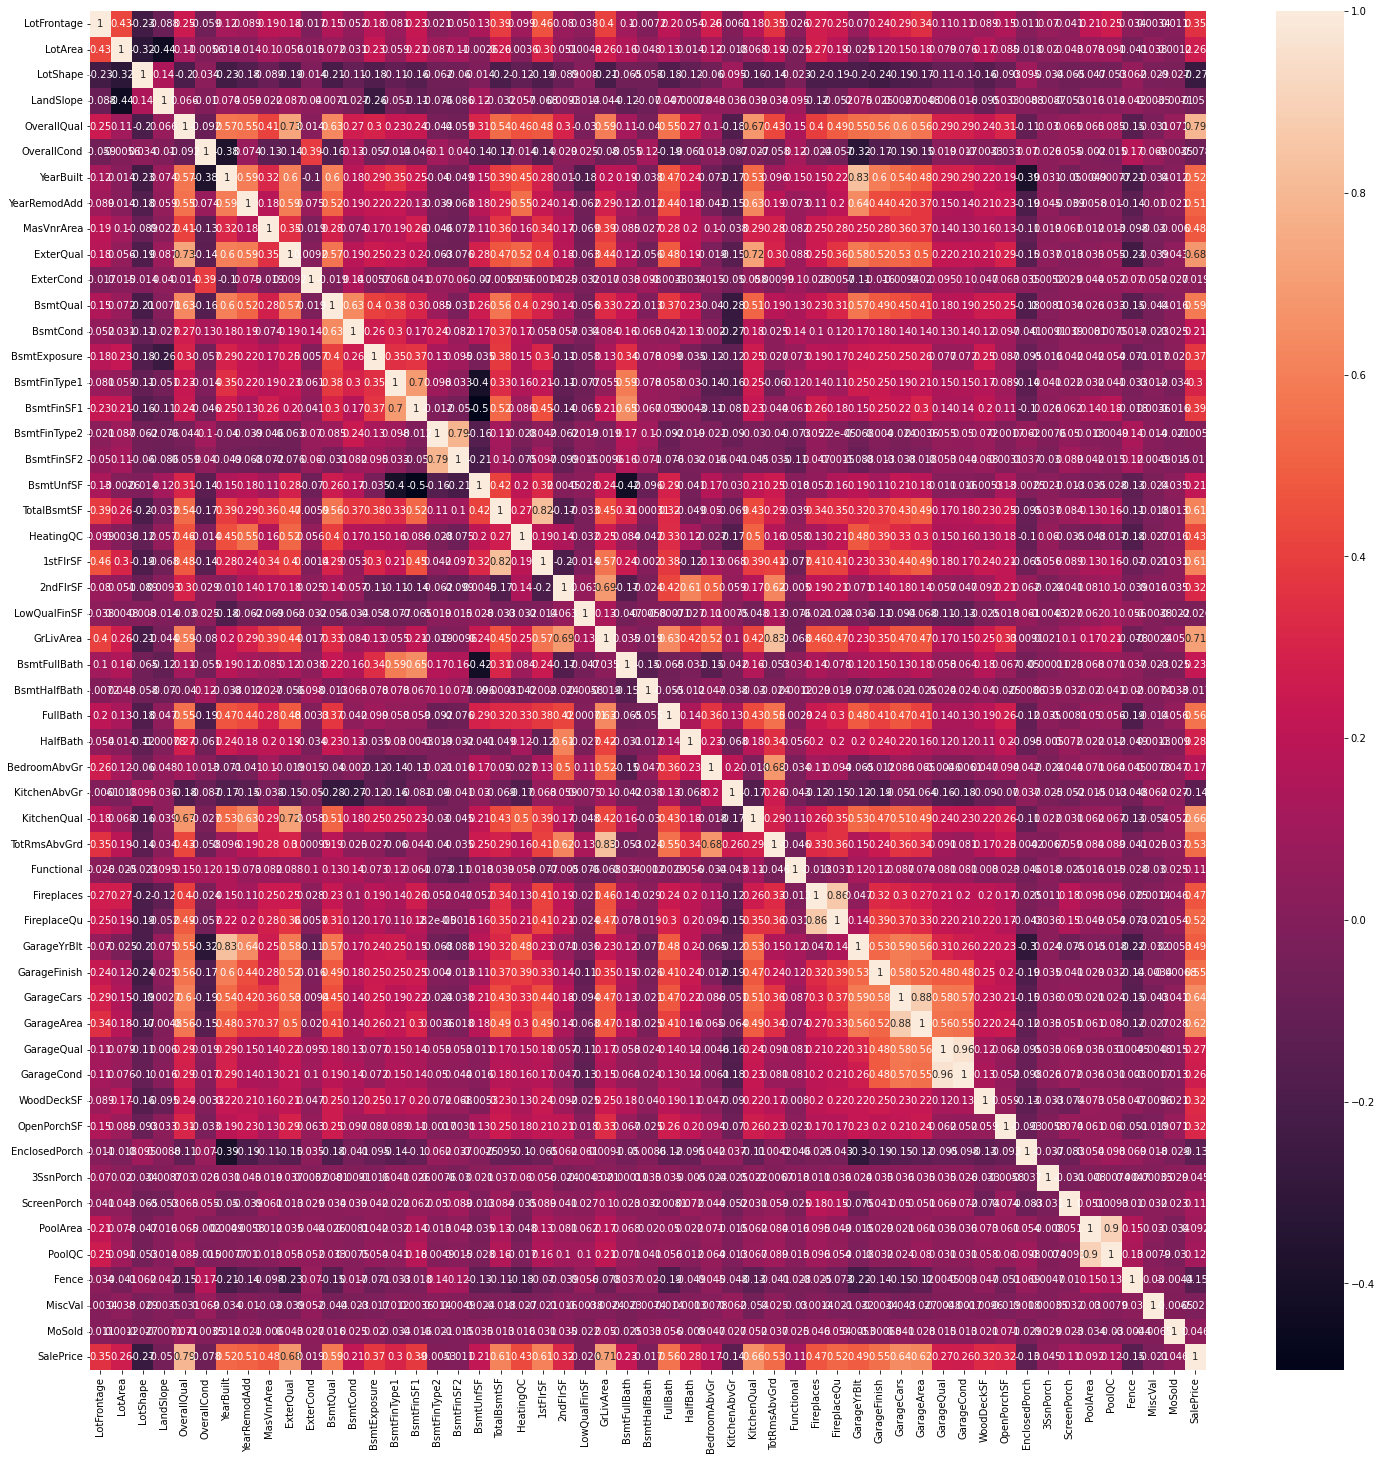

In [13]:
corr = train_num.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot = True)
plt.show()

- PoolQC, PoolArea have **0.9** MultiCorrelation
- GarageQual, GarageCond have **0.96** MultiCorrelation
- GarageFinish, GarageCars have **0.88** MultiCorrelation
- FirePlaces,  Functional have **0.86** MultiCorrelation
- GarageYrBlt, YearBuilt have **0.83** MultiCorrelation
- GrLivArea, TotRmsAbvGrd have **0.83** MultiCorrelation
- BsmtFinSF2, BsmtFinType2 have **0.79** MultiCorrelation
- TotalBsmtFinSF, lstFirSF have **0.82** MultiCorrelation
- **Important Note:** I'll drop one of the column in each Multicorrelation situation but i'll drop the one who's have less correlation with the targt variable

In [14]:
train_num.drop(columns = ['PoolArea','GarageCond','GarageFinish', 'Functional','GarageYrBlt', 'TotRmsAbvGrd','BsmtFinType2','1stFlrSF'], inplace = True, axis = 1)
test_num.drop(columns = ['PoolArea','GarageCond','GarageFinish', 'Functional','GarageYrBlt', 'TotRmsAbvGrd','BsmtFinType2','1stFlrSF'], inplace = True, axis = 1)

In [15]:
corr2 = train_num.corr()
corr2['SalePrice'].sort_values(ascending = False).abs()

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
ExterQual        0.682639
KitchenQual      0.659600
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
BsmtQual         0.585207
FullBath         0.560664
YearBuilt        0.522897
FireplaceQu      0.520438
YearRemodAdd     0.507101
MasVnrArea       0.477493
Fireplaces       0.466929
HeatingQC        0.427649
BsmtFinSF1       0.386420
BsmtExposure     0.374696
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtFinType1     0.304908
HalfBath         0.284108
GarageQual       0.273839
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BsmtCond         0.212607
BedroomAbvGr     0.168213
PoolQC           0.115484
ScreenPorch      0.111447
MoSold           0.046432
3SsnPorch        0.044584
ExterCond        0.018899
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
LowQualFinSF

In [16]:
# Create list for feature enginnering, any feature have less than 20% correlation I'll put it in this list.
fe_list = ['BsmtUnfSF','BsmtCond', 'BedroomAbvGr', 'PoolQC', 'ScreenPorch', 'MoSold', '3SsnPorch', 'ExterCond','BsmtFinSF2',
          'BsmtHalfBath','MiscVal ', 'LowQualFinSF', 'LandSlope', 'OverallCond ', 'EnclosedPorch',  'KitchenAbvGr','Fence' ]

# Preprocessing for numerical variables

In [17]:
train_num.isnull().sum()

LotFrontage      259
LotArea            0
LotShape           0
LandSlope          0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
Fireplaces         0
FireplaceQu        0
GarageCars         0
GarageArea         0
GarageQual         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolQC             0
Fence              0
MiscVal            0
MoSold             0
SalePrice          0
dtype: int64

In [18]:
train_num = train_num.fillna(train_num.median())
test_num = test_num.fillna(test_num.median())

- Take the log for the selected feature 

In [19]:
train_num[skewed_list] = train_num[skewed_list].apply(lambda i: np.log1p(i))
test_num[skewed_list] = test_num[skewed_list].apply(lambda i: np.log1p(i))

In [20]:
y = train_num['SalePrice']
train_num = train_num.iloc[:,:-1]
train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   LotShape       1460 non-null   int64  
 3   LandSlope      1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   ExterQual      1460 non-null   int64  
 10  ExterCond      1460 non-null   int64  
 11  BsmtQual       1460 non-null   int64  
 12  BsmtCond       1460 non-null   int64  
 13  BsmtExposure   1460 non-null   int64  
 14  BsmtFinType1   1460 non-null   int64  
 15  BsmtFinSF1     1460 non-null   int64  
 16  BsmtFinSF2     1460 non-null   float64
 17  BsmtUnfSF      1460 non-null   float64
 18  TotalBsm

# what about Categorical Data

In [21]:
train_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LandContour         0
Utilities           0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
Foundation          0
Heating             0
CentralAir          0
Electrical          1
GarageType         81
PavedDrive          0
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# I'll Cheack The Dependancey

In [22]:
def dependency(data,feature):
    
    table = pd.crosstab(data['SalePrice'],data[feature])
    stat, p, dof, excpected = chi2_contingency(table) 

    print(dof)
    significance_level = 0.05
    print("p value: " + str(p)) 

    if p <= significance_level: 
        print( f'{feature}: REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT')
        return(feature)
    else: 
        print(f'{feature}: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT')

In [23]:

for i in train_cat.columns:
    dependency(house_train,i)


2648
p value: 4.348325060681923e-11
MSZoning: REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT
662
p value: 8.338870380463891e-09
Street: REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT
81
p value: 0.20972415885759163
Alley: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
1986
p value: 0.08674645041917711
LandContour: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
662
p value: 1.0
Utilities: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
2648
p value: 0.0458062119580343
LotConfig: REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT
15888
p value: 1.3649601026881368e-08
Neighborhood: REJECT NULL HYPOTHESIS, THE VARIABLES ARE DEPENDENT
5296
p value: 1.0
Condition1: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
4634
p value: 0.07598640644469955
Condition2: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
2648
p value: 0.9999860714473023
BldgType: ACCEPT NULL HYPOTHESIS, THE VARIABLES ARE INDEPENDENT
4634
p value: 0.6482615179447816
HouseStyle: ACCEP

In [24]:
dependent = ['MSZoning','Street','LotConfig','Neighborhood','MasVnrType',
             'Foundation','CentralAir','SaleType','SaleCondition']

In [25]:
train_cat = pd.get_dummies(train_cat[dependent], drop_first = True)
test_cat = pd.get_dummies(test_cat[dependent], drop_first = True)

In [26]:
train_num.shape

(1460, 44)

In [27]:
fe_list

['BsmtUnfSF',
 'BsmtCond',
 'BedroomAbvGr',
 'PoolQC',
 'ScreenPorch',
 'MoSold',
 '3SsnPorch',
 'ExterCond',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal ',
 'LowQualFinSF',
 'LandSlope',
 'OverallCond ',
 'EnclosedPorch',
 'KitchenAbvGr',
 'Fence']

In [28]:
train_num_2 = train_num.copy() 
test_num_2 = test_num.copy()

In [29]:
train_num_2['BsmtUnfSF'] = train_num_2['BsmtUnfSF']**2
test_num_2['BsmtUnfSF'] = test_num_2['BsmtUnfSF']**2

train_num_2['BsmtCond'] = train_num_2['BsmtCond']**2
test_num_2['BsmtCond'] = test_num_2['BsmtCond']**2

train_num_2['BedroomAbvGr'] = train_num_2['BedroomAbvGr']**2
test_num_2['BedroomAbvGr'] = test_num_2['BedroomAbvGr']**2

train_num_2['PoolQC'] = train_num_2['PoolQC']**2
test_num_2['PoolQC'] = test_num_2['PoolQC']**2

train_num_2['ScreenPorch'] = train_num_2['ScreenPorch']**2
test_num_2['ScreenPorch'] = test_num_2['ScreenPorch']**2

train_num_2['MoSold'] = train_num_2['MoSold']**2
test_num_2['MoSold'] = test_num_2['MoSold']**2

train_num_2['3SsnPorch'] = train_num_2['3SsnPorch']**2
test_num_2['3SsnPorch'] = test_num_2['3SsnPorch']**2

train_num_2['ExterCond'] = train_num_2['ExterCond']**2
test_num_2['ExterCond'] = test_num_2['ExterCond']**2

train_num_2['BsmtFinSF2'] = train_num_2['BsmtFinSF2']**2
test_num_2['BsmtFinSF2'] = test_num_2['BsmtFinSF2']**2

train_num_2['BsmtHalfBath'] = train_num_2['BsmtHalfBath']**2
test_num_2['BsmtHalfBath'] = test_num_2['BsmtHalfBath']**2

train_num_2['MiscVal'] = train_num_2['MiscVal']**2
test_num_2['MiscVal'] = test_num_2['MiscVal']**2

train_num_2['LowQualFinSF'] = train_num_2['LowQualFinSF']**2
test_num_2['LowQualFinSF'] = test_num_2['LowQualFinSF']**2

In [30]:
#test_2.shape
#train_2.shape

In [31]:
frames = [train_num, train_cat]
frames2 = [test_num, test_cat]

train = pd.concat(frames, axis = 1)
test = pd.concat(frames2, axis = 1)


In [32]:
frames_2 = [train_num_2, train_cat]
frames2_2 = [test_num_2, test_cat]

train_2 = pd.concat(frames_2, axis = 1)
test_2 = pd.concat(frames2_2, axis = 1)

In [33]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning_FV            1460 non-null   uint8
 1   MSZoning_RH            1460 non-null   uint8
 2   MSZoning_RL            1460 non-null   uint8
 3   MSZoning_RM            1460 non-null   uint8
 4   Street_Pave            1460 non-null   uint8
 5   LotConfig_CulDSac      1460 non-null   uint8
 6   LotConfig_FR2          1460 non-null   uint8
 7   LotConfig_FR3          1460 non-null   uint8
 8   LotConfig_Inside       1460 non-null   uint8
 9   Neighborhood_Blueste   1460 non-null   uint8
 10  Neighborhood_BrDale    1460 non-null   uint8
 11  Neighborhood_BrkSide   1460 non-null   uint8
 12  Neighborhood_ClearCr   1460 non-null   uint8
 13  Neighborhood_CollgCr   1460 non-null   uint8
 14  Neighborhood_Crawfor   1460 non-null   uint8
 15  Neighborhood_Edwards   1460 non-null  

- Standardize the data

In [34]:
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.fit_transform(test)

In [35]:
train_2 = sc.fit_transform(train_2)
test_2 = sc.fit_transform(test_2)

- Let's look about our target variable

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

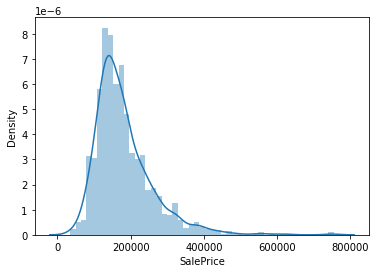

In [36]:
sns.distplot(y)

- It's Obviously very skewed 

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

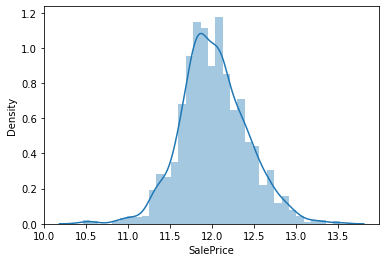

In [37]:
y = np.log1p(y)
sns.distplot(y)

# LinearRegression

In [38]:
lr = LinearRegression()
cv_lr = cross_val_score(lr, train,y,cv=10, scoring = 'neg_root_mean_squared_error')
cv_lr.mean()
lr.fit(train,y)

LinearRegression()

# ElasticNet

In [39]:
l1_space = np.linspace(0, 1, 50)
param_grid = {'l1_ratio': l1_space}
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=10, scoring = 'neg_root_mean_squared_error')
gm_cv.fit(train,y)
gm_cv.score(train,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.191e+01, tolerance: 2.119e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e+01, tolerance: 2.100e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented

-0.14086564394030754

# Ridge

In [40]:
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
ridge = Ridge()

ridge_cv = GridSearchCV(ridge, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
ridge_cv.fit(train,y)
ridge_cv.score(train,y)

-0.11562087741309922

# Lasso

In [41]:
alpha_space = np.linspace(0, 1, 50)
params_grid = {'alpha':alpha_space}
lasso = Lasso()

lasso_cv = GridSearchCV(lasso, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
lasso_cv.fit(train,y)
lasso_cv.score(train,y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.817e+00, tolerance: 2.119e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

-0.11561424069668992

# SGDRegressor

In [42]:
alpha_space = np.linspace(0, 1, 30)
params_grid = {'alpha':alpha_space}
SGD = SGDRegressor()

SGD_cv = GridSearchCV(SGD, params_grid, cv=10, scoring = 'neg_root_mean_squared_error')
SGD_cv.fit(train,y)
SGD_cv.score(train,y)  

-0.12031642113995449

# XGBoost

In [43]:
xgb_reg = xgb.XGBRegressor(n_estimators = 1000,
                          max_depth = 5,
                          learning_rate = 0.01,
                            reg_alpha = 1,
                              reg_lambda = 0.5)
xgb_reg.fit(train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=0.5, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

# SVR

In [44]:
svr = SVR(kernel = 'linear')
svr.fit(train,y)

SVR(kernel='linear')

In [45]:
test_id = house_test['Id']

In [46]:
out = np.expm1(lasso_cv.predict(test))
sub = pd.DataFrame({'id':test_id, 'SalePrice':out})
print(sub.head())
sub.to_csv('Submission.csv',index=False)

     id      SalePrice
0  1461  140881.959345
1  1462  158683.291365
2  1463  183359.015802
3  1464  197866.003964
4  1465  217280.044177
